# UNIDAD 4 - PROYECTO: ANÁLISIS DE SENTIMIENTOS Y PREDICCIÓN.

## ALUMNO: BRENDA CORTES AGUILAR
## NÚMERO DE CONTROL: 20120097


## PRESENTACIÓN.

El siguiente proyecto consiste en emplear el análisis de sentimientos para tratar de predecir las calificaciones de una serie.

El dataset es sobre las calificaciones que recibió la adaptación al "live-action" el anime "OnePiece".

El dataset contiene las reseñas que se recibieron en la plataforma de Netflix, el dataset contiene información como:

* Título.
* Reseña.
* Fecha.
* Calificación.

## ETAPA 1: ANÁLISIS EXPLORATORIO DE LOS DATOS.

### Paso 1. Importe las librerías necesarias (pandas, numpy, seaborn, nltk, etc...)


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('vader_lexicon', quiet=True)

from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import numpy as np

### Paso 2. Cargue y muestre información del dataset; muestre información estadística de las columnas numéricas.

In [2]:
df = pd.read_csv('reviews.csv')

In [3]:
df.head()

,Title,Review,Date,Rating
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,4 September 2023,8.0
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,4 September 2023,9.0
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,1 September 2023,9.0
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,4 September 2023,10.0
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",31 August 2023,10.0


In [4]:
df.tail()

,Title,Review,Date,Rating
873,Most faithful and high quality adaptation sinc...,I haven't written a review in a very long time...,2 September 2023,10.0
874,Me and my son loving it! The best entertaining...,This is my first IMDb review.\n\nI've watched ...,1 September 2023,9.0
875,A very good adaptation to the famous anime,"An absolute gem! This show is a must-watch, an...",3 September 2023,10.0
876,This wonderful thing...,I recently dived (no pun intended) into the wo...,2 September 2023,10.0
877,Best adaptation so far,I watched first eposide and I can say they did...,1 September 2023,9.0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   878 non-null    object 
 1   Review  878 non-null    object 
 2   Date    878 non-null    object 
 3   Rating  870 non-null    float64
dtypes: float64(1), object(3)
memory usage: 27.6+ KB
None


In [35]:
df['Rating'].describe()

count    870.000000
mean       8.517241
std        2.268826
min        1.000000
25%        8.000000
50%        9.000000
75%       10.000000
max       10.000000
Name: Rating, dtype: float64

Podemos observar que el data set contiene 4 columnas, con 878 registros, donde únicamente podemos observar una única columna de tipo numérica llamada 'Rating'.

### Paso 3. Identifique los datos nulos: muestre las filas que contienen datos nulos (no se deben tratar aún).

In [6]:
nulos = df.isnull().sum().sort_values(ascending=False)
print(nulos)

Rating    8
Title     0
Review    0
Date      0
dtype: int64


Podemos observar que "Rating" tiene 8 valores nulos. Las otras columnas, "Title", "Review" y "Date", no tienen valores nulos.
Por la cantidad de datos, estos datos se podrían eliminar, en caso de que sea necesario aplicarles algún tratamiento. 

### Paso 4. Muestre la distribución de la columna "Rating", haga un análisis de la distribución.

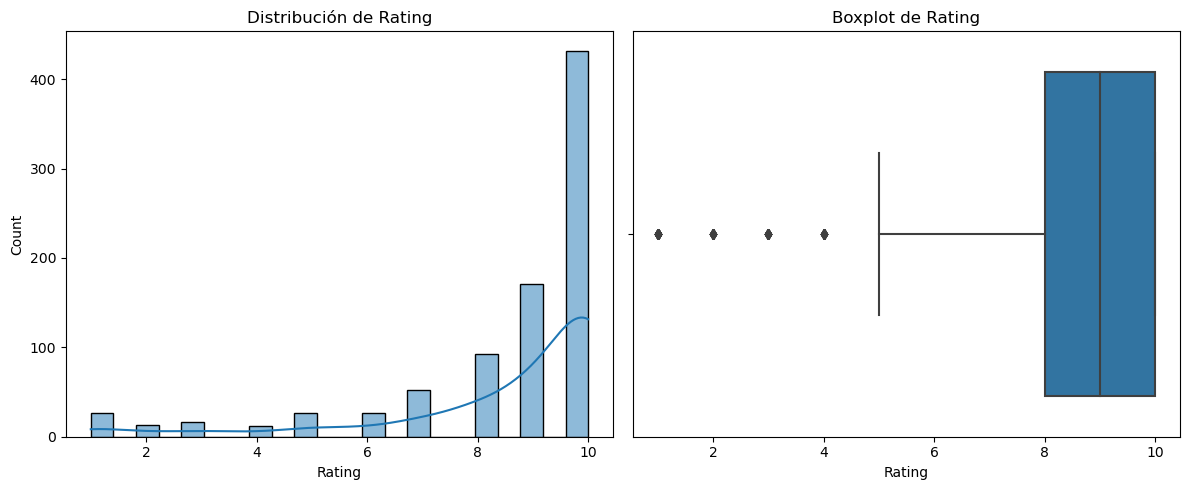

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Rating'], kde=True)
plt.title('Distribución de Rating')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Rating'])
plt.title('Boxplot de Rating')

plt.tight_layout()
plt.show()

Podemos observar que la variable'Rating' cuanta con valores que varían entre 1, 2, ..., 10, entonces podemos decir que estamos frente a una variable discreta, por lo que podríamos encontrarnos frente a un problema de clasificación, esta variable representa la calificación que obtuvo el live-action y por la forma de la distribución, podríamos decir que la mayoría de las calificaciones son altas. 

### Paso 5. Identifique si alguna de las columnas se puede convertir en categórica.

In [8]:
df.nunique()

Title     878
Review    878
Date       40
Rating     10
dtype: int64

In [9]:
print(f"Cantidad de datos unicos en Date:", df['Date'].nunique())
print('Lista de valores unicos: ') 
df['Date'].unique().tolist()

Cantidad de datos unicos en Date: 40
Lista de valores unicos: 


['4 September 2023',
 '1 September 2023',
 '31 August 2023',
 '11 September 2023',
 '16 September 2023',
 '6 September 2023',
 '2 September 2023',
 '1 October 2023',
 '5 September 2023',
 '7 September 2023',
 '10 September 2023',
 '9 September 2023',
 '14 September 2023',
 '24 September 2023',
 '3 October 2023',
 '5 October 2023',
 '22 September 2023',
 '26 September 2023',
 '3 September 2023',
 '29 September 2023',
 '17 September 2023',
 '18 September 2023',
 '12 September 2023',
 '27 September 2023',
 '15 September 2023',
 '8 September 2023',
 '20 September 2023',
 '21 September 2023',
 '25 September 2023',
 '13 September 2023',
 '23 September 2023',
 '4 October 2023',
 '30 September 2023',
 '19 September 2023',
 '8 October 2023',
 '28 September 2023',
 '2 October 2023',
 '9 October 2023',
 '7 October 2023',
 '6 October 2023']

Una vez analizado la cantidad de datos únicos y dado el contexto de las variables:

Title y Review: Estas columnas tienen un número muy grande de valores únicos. Convertirlas a categóricas podría no ser beneficioso, ya que las categorías podrían ser demasiado específicas. 

Date: Tiene 40 valores únicos. Esta variable podría ser candidata, porque únicamente se registran variación de dos meses en un mismo año, y varían, dado que se considera el día, podríamos llevar una categorización por mes; sin embargo, debemos de analizar que tan conveniente podría llegar a ser.  

Rating: Tiene 10 valores únicos, aunque podemos tratarla como una clasificación, convertir esta columna a categórica podría no ser apropiado porque podemos trabajar con los valores numéricos.


## ETAPA 2: ANÁLISIS DE SENTIMIENTOS.

### Paso 1. Muestre las primeras 10 filas del dataset con las columnas "Rating" y "Review", haga un análisis rápido de esa información.

In [10]:
df[['Title', 'Review']].head(10)

,Title,Review
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse..."
5,Wow! Just Big Wow!!,GREAT ADAPTATION! As an old-school fan (since ...
6,"Not an anime fan, but this a fun adventure!",My kids play and watch One Piece anime and lov...
7,Netflix can make something great,I was so surprised that Netflix made something...
8,Refreshingly Fun,Parenthetically I don't know anything about th...
9,Best show of the year!!,Initially I was apprehensive because of anime ...


### Paso 2. Haga una función que se encargue del pre-procesamiento:
#### - Genere los tokens.
#### - Filtre las palabras de parada.
#### - Obtenga el lema de las palabras y guárdelo en una lista.
#### - Retorne la lista en forma de una cadena, para ello debe unir los elementos de la lista mediante un espacio.

In [11]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    lemmatizer = WordNetLemmatizer()  
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

### Paso 3. Aplique la función creada para obtener el lema de las columnas "Review" y "Title", guárde el resultado en nuevas columnas dentro del dataframe original (por ejemplo: "ReviewText", "TitleText").

In [12]:
df['ReviewText'] = df['Review'].apply(preprocess_text)
df['TitleText'] = df['Title'].apply(preprocess_text)

In [13]:
df[['ReviewText', 'TitleText']].head(10)

,ReviewText,TitleText
0,admit 've never watched animated show one piec...,never seen anime still enjoyed
1,'m 60yo man & old school like marine admiral 😄...,kind show . loved .
2,every live action anime 've briefly seen nothi...,'m shocked good ...
3,bar none one best live-action adaption animate...,see netflix ? ? ...
4,"one piece fan , bit insecured starting series ...",want season 2
5,great adaptation ! old-school fan ( since 2006...,wow ! big wow ! !
6,kid play watch one piece anime love ! n't terr...,"anime fan , fun adventure !"
7,surprised netflix made something incredible . ...,netflix make something great
8,parenthetically n't know anything source mater...,refreshingly fun
9,initially apprehensive anime adaptation produc...,best show year ! !


### Paso 4. Haga una función para obtener el sentimiento de las palabras, para ello puede utilizar el SentimentIntensityAnalizer() y su función "polarity_scores()". Al final debe retornar el puntaje de sentimiento.

In [14]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment


### Paso 5. Aplique la función creada para obtener el sentimiento en las columnas creadas en el paso 3, guarde el resultado en un par de columnas nuevas (por ejemplo: "ReviewSentiment", "TitleSentiment").

In [15]:
df['ReviewSentiment'] = df['ReviewText'].apply(get_sentiment)
df['TitleSentiment'] = df['TitleText'].apply(get_sentiment)

In [16]:
df[['ReviewSentiment', 'TitleSentiment']].head(10)

,ReviewSentiment,TitleSentiment
0,1,1
1,1,1
2,1,1
3,1,0
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


### Paso 6. Prepare un dataframe con las columnas originales + las columnas creadas previamente, tendrían que haber 8 columnas, 3 de ellas deben ser numéricas (incluyendo "Rating").

In [17]:
df_nuevo = df.copy()

In [18]:
print(df_nuevo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            878 non-null    object 
 1   Review           878 non-null    object 
 2   Date             878 non-null    object 
 3   Rating           870 non-null    float64
 4   ReviewText       878 non-null    object 
 5   TitleText        878 non-null    object 
 6   ReviewSentiment  878 non-null    int64  
 7   TitleSentiment   878 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 55.0+ KB
None


In [19]:
df_nuevo.head()

,Title,Review,Date,Rating,ReviewText,TitleText,ReviewSentiment,TitleSentiment
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,4 September 2023,8.0,admit 've never watched animated show one piec...,never seen anime still enjoyed,1,1
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,4 September 2023,9.0,'m 60yo man & old school like marine admiral 😄...,kind show . loved .,1,1
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,1 September 2023,9.0,every live action anime 've briefly seen nothi...,'m shocked good ...,1,1
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,4 September 2023,10.0,bar none one best live-action adaption animate...,see netflix ? ? ...,1,0
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",31 August 2023,10.0,"one piece fan , bit insecured starting series ...",want season 2,1,1


## ETAPA 3: MACHINE LEARNING.

### Paso 1. Asigne a la variable X las columnas numéricas menos "Rating"; asigne a la variable Y la columna "Rating", seleccione únicamente las filas sin datos nulos (no elimine ni trate las filas con datos nulos, esas se usarán para predecir)

In [20]:
df_sin_nulos = df_nuevo.dropna()
X = df_sin_nulos[['ReviewSentiment','TitleSentiment']]
Y = df_sin_nulos['Rating']

### Paso 2. Divida en una muestra de entrenamiento y en una muestra de pruebas, estratifique en base a la proporción de la variable objetivo. El tamaño de la muestra para entrenamiento debe ser del 85%. Asigne una semilla para poder reproducir los resultados.


In [21]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=123)

### Paso 3. Entrene los siguientes modelos:
#### - KNN para clasificación


In [22]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_entrenamiento, y_entrenamiento)
knn_predicciones = knn_model.predict(x_prueba)

#### - SVM para clasificación

In [23]:
svm_model = SVC()
svm_model.fit(x_entrenamiento, y_entrenamiento)
svm_predicciones = svm_model.predict(x_prueba)

#### - RandomForest para clasificación

In [24]:
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(x_entrenamiento, y_entrenamiento)
rf_predicciones = rf_model.predict(x_prueba)

### Paso 4. Evalúe el rendimiento de los modelos (puede usar accuracy) creados en el paso previo, muestre las predicciones realizadas y compare con las etiquetas reales.

In [25]:
df_resultados = pd.DataFrame({
    'KNN_Predicciones': knn_predicciones,
    'SVM_Predicciones': svm_predicciones,
    'RF_Predicciones': rf_predicciones,
    'Etiquetas_Reales': y_prueba
})

df_resultados.head(20)

,KNN_Predicciones,SVM_Predicciones,RF_Predicciones,Etiquetas_Reales
808,9.0,10.0,10.0,10.0
576,9.0,10.0,10.0,1.0
829,9.0,10.0,10.0,10.0
401,9.0,10.0,10.0,10.0
146,9.0,10.0,10.0,10.0
457,9.0,10.0,10.0,9.0
425,9.0,10.0,10.0,9.0
322,9.0,10.0,10.0,4.0
154,9.0,10.0,10.0,5.0
785,9.0,10.0,10.0,10.0


In [26]:
df_resultados.tail(20)

,KNN_Predicciones,SVM_Predicciones,RF_Predicciones,Etiquetas_Reales
527,9.0,10.0,10.0,10.0
67,9.0,10.0,10.0,10.0
42,9.0,10.0,10.0,9.0
281,9.0,10.0,10.0,10.0
460,9.0,10.0,10.0,10.0
213,9.0,10.0,10.0,8.0
312,9.0,10.0,10.0,8.0
114,9.0,10.0,10.0,3.0
353,9.0,10.0,10.0,10.0
66,9.0,10.0,10.0,2.0


In [27]:
precision_knn = accuracy_score(y_prueba, knn_predicciones)
print(f"Precisión del modelo KNN: {precision_knn}")

precision_svm = accuracy_score(y_prueba, svm_predicciones)
print(f"Precisión del modelo SVM: {precision_svm}")

precision_rf = accuracy_score(y_prueba, rf_predicciones)
print(f"Precisión del modelo RandomForest: {precision_rf}")

Precisión del modelo KNN: 0.1984732824427481
Precisión del modelo SVM: 0.4961832061068702
Precisión del modelo RandomForest: 0.4961832061068702


En este caso, tanto el modelo SVM como el modelo RandomForest muestran una precisión similar, aproximadamente del 49.62%, mientras que el modelo KNN presenta una precisión más baja, alrededor del 19.85%. 

En los tres modelos la precisión es relativamente baja. Si prestamos atención en las listas de predicciones vs el valor real, podemos darnos cuenta del mal comportamiento que tienen. 

Existen calificaciones cuyo valor real es superbajo; sin embargo, los tres modelos lo clasificas en las clases de 9 o 10.  Por otro lado, aceitan positivamente cuando la calificación es alta. 

### Paso 5. Debido a que este es un problema de clasificación, pero hay varias clases que son originalmente numéricas, se puede aplicar también una métrica de evaluación para regresión. Aplique el RMSE a las predicciones y las etiquetas reales, analice el resultado.

In [28]:
for model in [knn_model, svm_model, rf_model]:
    y_pred = model.predict(x_prueba)
    print(f"RMSE of {model.__class__.__name__}: {np.sqrt(mean_squared_error(y_prueba, y_pred))}")


RMSE of KNeighborsClassifier: 2.29003816762086
RMSE of SVC: 2.6787259133931505
RMSE of RandomForestClassifier: 2.6787259133931505


En términos de RMSE, el modelo KNN tiene un rendimiento ligeramente mejor que los modelos SVM y RandomForest.
Independientemente de los valores de estas métricas, considero que los modelos no tienen un desempeño aceptable.

### Paso 6. Utilice el modelo que se comportó mejor para predecir el "Rating" de las filas que tienen ese dato nulo, revise manualmente si la calificación predicha es consistente con el comentario en la reseña.


In [29]:
filas_con_nulos = df_nuevo[df_nuevo['Rating'].isnull()]

X_prediccion = filas_con_nulos[['ReviewSentiment', 'TitleSentiment']]

predicciones = svm_model.predict(X_prediccion)


df_predicciones = pd.DataFrame({
    'Rating_Predicho': predicciones,
    'Rating_Real': filas_con_nulos['Rating'],
    'Review': filas_con_nulos['Review'],
    'Title': filas_con_nulos['Title'],    
})



In [30]:
df_predicciones

,Rating_Predicho,Rating_Real,Review,Title
143,10.0,NaN,"I admit, when I write reviews it's usually whe...","I didn't expect much, but I absolutely love it."
145,10.0,NaN,"Fun fact: Eiichiro Oda, the creator of the man...","Thank you for heading this, Oda!"
447,10.0,NaN,Just because there are many scenes in the mang...,DIFFERENT MEDIA MEANS DIFFERENT STORYTELLING A...
500,10.0,NaN,I like the characters so far except Sanji's ha...,I'm not sure about rating yet!
520,10.0,NaN,One Piece somehow managed to pull it off: a le...,Great adaptation!
540,10.0,NaN,As a life long fan of One Piece I don't know w...,My disappointment is immeasurable
569,10.0,NaN,If you browse there are series with more actio...,A must watch
782,10.0,NaN,Everything went so right with casting and thei...,Emily Rudd's hair as Nami


In [31]:
#  pd.set_option('display.max_colwidth', None) # Use para poder visualizar mejor el contenido de la columna
df_predicciones['Review']

143    I admit, when I write reviews it's usually whe...
145    Fun fact: Eiichiro Oda, the creator of the man...
447    Just because there are many scenes in the mang...
500    I like the characters so far except Sanji's ha...
520    One Piece somehow managed to pull it off: a le...
540    As a life long fan of One Piece I don't know w...
569    If you browse there are series with more actio...
782    Everything went so right with casting and thei...
Name: Review, dtype: object

### Paso 7. Escriba sus conclusiones al respecto.

Podemos observar que el modelo esta clasificando positivamnete las reseñas, sin embargo, no es consistente, si bien la mayoria de las reseñas son positivas, hay un para como la del registro 500 y 450 cuyas reseñas expresan comentarios negativos, exiten otras que expresan comentarios neutros o con alguna queja, por lo que tal vez el valor 10 no seria la mejor clasificacion.

Debemos de tomar en cuenta que la clase SentimentIntensityAnalyzer se basa en un modelo preentrenado que asigna puntajes de intensidad de sentimiento a las palabras y calcula el sentimiento general del texto basándose en estos puntajes.
Debido a la capacidad como seres humanos de expresar sentimientos de formas  tan variados, podemos estar obteniendo puntajes desproporcionados o sesgados y quizá esto sea lo que provoque que el modelo se inclinen a predecir siempre una crítica como buena, cuando no lo es.  
Es claro que el modelo se equivoca al clasificar una reseña en un puntaje alto, y no al revés, clasificando bajo. 

## ETAPA 4: PRESENTACIÓN DEL PROYECTO.
### Al igual que en los proyectos anteriores, suba su trabajo terminado a un repositorio nuevo de su GitHub.
### Escriba un archivo "README" y describa el proceso seguido en este trabajo.
### Al entregar este trabajo, debe subir este archivo, el archivo de instrucciones y el enlace al repositorio público de GitHub con este trabajo.